# [TEST] PDDLStream-test-samples-ikmp-analysis-comparemine-print

In [ ]:
# # python3 /home/rnb/Projects/rnb-planning/src/pkg/planning/filtering/lattice_model/shared_lattice_predictor.py --rtype panda

# import SharedArray as sa
# ROBOT_TYPE_NAME = 'panda'
# sa.delete("shm://{}.prepared".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.grasp_img".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.arm_img".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.rh_vals".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.result".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.query_in".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.response_out".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.query_quit".format(ROBOT_TYPE_NAME))

In [1]:
from __future__ import print_function
import os
import sys
RNB_PLANNING_DIR = os.environ["RNB_PLANNING_DIR"]
sys.path.append(os.path.join(RNB_PLANNING_DIR, 'src'))
from pkg.controller.combined_robot import *
from pkg.utils.utils import get_now, try_mkdir
import subprocess

DATA_PATH = os.path.join(RNB_PLANNING_DIR, "data")
try_mkdir(DATA_PATH)

DAT_ROOT = "stowing-deep"
TEST_DATA_PATH = os.path.join(DATA_PATH, DAT_ROOT)
try_mkdir(TEST_DATA_PATH)

IK_NUMS = [1,2,4,8, 16,32,64]
RESULT_PATHS = []
IK_DIR_FORM = "stowing-deep-result-analysis-ik{:03}-mp2fix"
for ik_num in IK_NUMS:
    RES_ROOT = IK_DIR_FORM.format(ik_num)
    TEST_RESULT_PATH = os.path.join(DATA_PATH, RES_ROOT)
    try_mkdir(TEST_RESULT_PATH)
    RESULT_PATHS.append(RES_ROOT)

HEADS = ["plan_time", "length", "MP_count", "failed_MPs", "IK_count", "failed_IKs", "success"]


## Common params

In [2]:
RTYPE = "panda"
DAT_DIR = '20210917-113211'
I_START = 0
I_END = 50


VISUALIZE = False
PLAY_RESULT = False
SHOW_STATE = False

TIMEOUT_MOTION = 2
MAX_TIME = 100
MAX_ITER = 100

GRASP_SAMPLE = 30
STABLE_SAMPLE = 50
SEARCH_SAMPLE_RATIO= 100
MAX_SKELETONS = 30
TIMED_COMPLETE = False
STACK_TIMELOG = True
IK_TRY_NUM = 30
VERBOSE = False
USE_MOVEIT_IK = True


common_args = [
            '--rtype', RTYPE,
            '--dat_root', DAT_ROOT,
            '--res_root', RES_ROOT,
            '--dat_dir', DAT_DIR,
            '--VISUALIZE', str(VISUALIZE),
            '--PLAY_RESULT', str(PLAY_RESULT),
            '--TIMEOUT_MOTION', str(TIMEOUT_MOTION),
            '--MAX_TIME', str(MAX_TIME),
            '--MAX_ITER', str(MAX_ITER), 
            '--GRASP_SAMPLE', str(GRASP_SAMPLE),
            '--STABLE_SAMPLE', str(STABLE_SAMPLE),
            '--SEARCH_SAMPLE_RATIO', str(SEARCH_SAMPLE_RATIO),
            '--MAX_SKELETONS', str(MAX_SKELETONS),
            '--TIMED_COMPLETE', str(TIMED_COMPLETE),
            '--STACK_TIMELOG', str(STACK_TIMELOG),
            '--IK_TRY_NUM', str(IK_TRY_NUM),
            '--VERBOSE', str(VERBOSE),
            '--USE_MOVEIT_IK', str(USE_MOVEIT_IK)]

## plot results

In [3]:
CNAME_SHOW = "None"

In [4]:
from plot_scripts import *

In [10]:

IK_NUMS = [1,2,4,8,16, 32, 64]
# IK_NUMS = [1, 2, 4, 8, 16]

In [11]:
try:
    resdat_all_accum = defaultdict(dict)
    CHECKERS = []
    for ik_num in IK_NUMS:
        resdat_all, res_dict_all = print_results(RES_ROOT=IK_DIR_FORM.format(ik_num), 
                                                 RTYPE="panda", 
                                                 DAT_DIR='20210917-113211',
                                                 CNAMES_EXCLUDE=[], read_only=True
                                                )
        cname_cur = "{:03}".format(ik_num)
        CHECKERS.append(cname_cur)
        for key in resdat_all.keys():
            resdat_all_accum[key][cname_cur]=resdat_all[key][CNAME_SHOW]
except Exception as e:
    TextColors.RED.println("ERROR: "+str(e))
    TextColors.RED.println('If you have not run the test script on this computer yet, please run "test loop" section below')

RES_ROOT: stowing-deep-result-analysis-ik001-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik002-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik004-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik008-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik016-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik032-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik064-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']


Text(0.5,1,'success ratios tot')

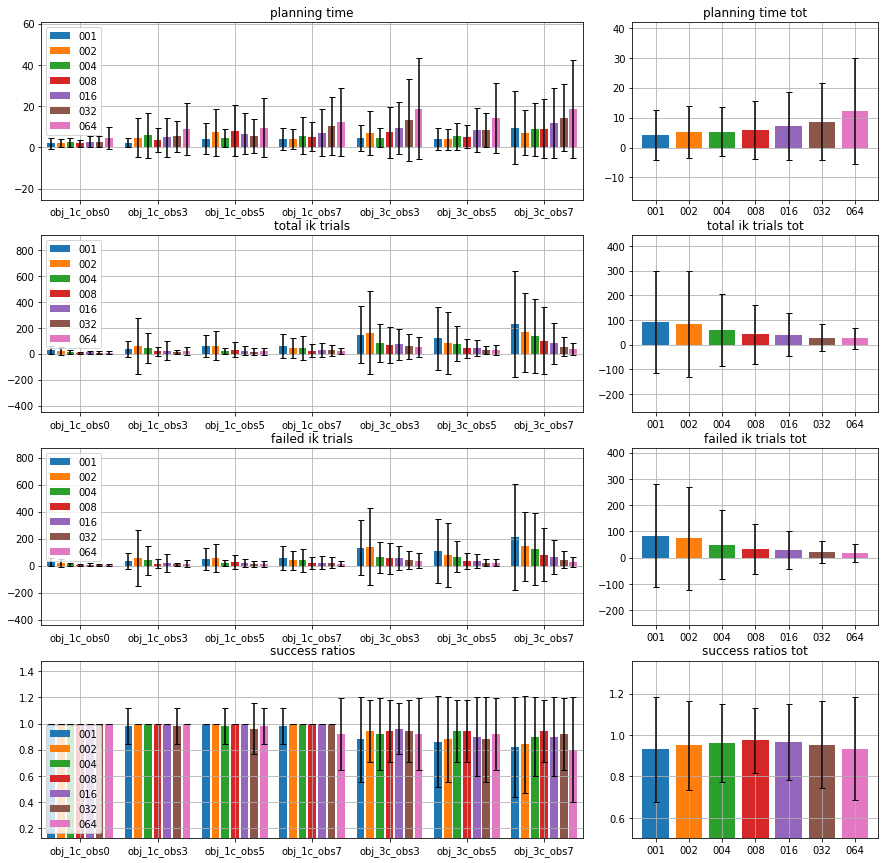

In [12]:
plt.figure(figsize=(15,15))

plt.subplot(4,3,(1, 2))
_ = plot_valid(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS, individual=True)
plt.title("planning time")
plt.subplot(4,3,3)
time_dict = plot_valid(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS, individual=True, average_all=True)
plt.title("planning time tot")

plt.subplot(4,3,(4, 5))
_ = plot_valid(resdat_all_accum, keys=["IK_tot"], CHECKERS=CHECKERS, individual=True)
plt.title("total ik trials")
plt.subplot(4,3,6)
_ = plot_valid(resdat_all_accum, keys=["IK_tot"], CHECKERS=CHECKERS, individual=True, average_all=True)
plt.title("total ik trials tot")

plt.subplot(4,3,(7, 8))
_ = plot_valid(resdat_all_accum, keys=["failed_IKs"], CHECKERS=CHECKERS, individual=True)
plt.title("failed ik trials")
plt.subplot(4,3,9)
_ = plot_valid(resdat_all_accum, keys=["failed_IKs"], CHECKERS=CHECKERS, individual=True, average_all=True)
plt.title("failed ik trials tot")

plt.subplot(4,3,(10, 11))
succ_dict = extract_values(resdat_all_accum, ["success"])
_ = grouped_bar(succ_dict)
plt.title("success ratios")
plt.subplot(4,3,12)
_ = grouped_bar(succ_dict, average_all=True)
plt.title("success ratios tot")

In [13]:
print("="*80)
success_vecs = [np.concatenate(map(lambda x: x["{:03}".format(ik_num)], succ_dict.values())) for ik_num in IK_NUMS]
success_means = map(np.mean, success_vecs)
max_val = np.max(success_means)
max_idc = np.where(success_means==max_val)[0]
print("IK_NUMS: ", "  ".join(map(lambda x:"{:5}".format(x), IK_NUMS)))
print("success: ", "  ".join(map(lambda x:"{:5.03}".format(x), success_means)))
print("best: {} ({:5.3})".format(np.array(IK_NUMS)[max_idc], max_val))
print("-"*80)
time_vecs = [np.concatenate(map(lambda x: x["{:03}".format(ik_num)], time_dict.values())) for ik_num in IK_NUMS]
time_means = np.array(map(np.mean, time_vecs))
min_val = np.min(time_means[max_idc])
min_idc = np.where(time_means[max_idc]==min_val)[0]
print("IK_NUMS: ", "  ".join(map(lambda x:"{:5}".format(x), IK_NUMS)))
print("times  : ", "  ".join(map(lambda x:"{:5.03}".format(x), time_means)))
print("best: {} ({:5.3})".format(np.array(IK_NUMS)[max_idc][min_idc], min_val))
print("="*80)

IK_NUMS:      1      2      4      8     16     32     64
success:  0.931  0.951  0.963  0.974  0.966  0.954  0.934
best: [8] (0.974)
--------------------------------------------------------------------------------
IK_NUMS:      1      2      4      8     16     32     64
times  :   4.26    5.2   5.31   5.82    7.2   8.61   12.2
best: [8] ( 5.82)


In [9]:
IK_NUM_BEST = np.array(IK_NUMS)[max_idc][min_idc[0]]
print("IK_NUM_BEST: {}".format(IK_NUM_BEST))

IK_NUM_BEST: 8


# MP analysis

In [58]:
IK_TRY_NUM = 8
MP_TIMES = [0.1,0.2,0.5,1.0,2.0,4.0,8.0]
RESULT_PATHS = []
MP_DIR_FORM = "stowing-deep-result-analysis-ik{:03}_mp{:.3}"
for mp_time in MP_TIMES:
    RES_ROOT = MP_DIR_FORM.format(IK_TRY_NUM, mp_time)
    TEST_RESULT_PATH = os.path.join(DATA_PATH, RES_ROOT)
    try_mkdir(TEST_RESULT_PATH)
    RESULT_PATHS.append(RES_ROOT)

## Common params

In [59]:
RTYPE = "panda"
DAT_DIR = '20210917-113211'
I_START = 0
I_END = 50


# CNAME_LIST = ['Full'] #,'Pairwise']
VISUALIZE = False
PLAY_RESULT = False
SHOW_STATE = False

TIMEOUT_MOTION = 5
MAX_TIME = 100
MAX_ITER = 100

GRASP_SAMPLE = 30
STABLE_SAMPLE = 50
SEARCH_SAMPLE_RATIO= 100
MAX_SKELETONS = 30
TIMED_COMPLETE = False
STACK_TIMELOG = True
IK_TRY_NUM = IK_TRY_NUM
VERBOSE = False
USE_MOVEIT_IK = True


common_args = [
            '--rtype', RTYPE,
            '--dat_root', DAT_ROOT,
            '--res_root', RES_ROOT,
            '--dat_dir', DAT_DIR,
            '--VISUALIZE', str(VISUALIZE),
            '--PLAY_RESULT', str(PLAY_RESULT),
            '--TIMEOUT_MOTION', str(TIMEOUT_MOTION),
            '--MAX_TIME', str(MAX_TIME),
            '--MAX_ITER', str(MAX_ITER), 
            '--GRASP_SAMPLE', str(GRASP_SAMPLE),
            '--STABLE_SAMPLE', str(STABLE_SAMPLE),
            '--SEARCH_SAMPLE_RATIO', str(SEARCH_SAMPLE_RATIO),
            '--MAX_SKELETONS', str(MAX_SKELETONS),
            '--TIMED_COMPLETE', str(TIMED_COMPLETE),
            '--STACK_TIMELOG', str(STACK_TIMELOG),
            '--IK_TRY_NUM', str(IK_TRY_NUM),
            '--VERBOSE', str(VERBOSE),
            '--USE_MOVEIT_IK', str(USE_MOVEIT_IK)]

## plot results

In [79]:
from plot_scripts import *
MP_TIMES_ALL = [0.1,0.2,0.5,1.0,2.0,4.0,8.0]

MP_TIMES = MP_TIMES_ALL
CNAME_SHOW = "Full"

In [80]:
try:
    resdat_all_accum = defaultdict(dict)
    CHECKERS = []
    for mp_time in MP_TIMES:
        resdat_all, res_dict_all = print_results(RES_ROOT=
                                                 MP_DIR_FORM.format(IK_TRY_NUM, mp_time), 
                                                 RTYPE="panda", 
                                                 DAT_DIR='20210917-113211',
                                                 CNAMES_EXCLUDE=[], read_only=False
                                                )
        cname_cur = "{:03}".format(mp_time)
        CHECKERS.append(cname_cur)
        for key in resdat_all.keys():
            resdat_all_accum[key][cname_cur]=resdat_all[key][CNAME_SHOW]
except Exception as e:
    TextColors.RED.println("ERROR: "+str(e))
    TextColors.RED.println('If you have not run the test script on this computer yet, please run "test loop" section below')

RES_ROOT: stowing-deep-result-analysis-ik008_mp0.1
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
obj_1
obj_1_obs3
obj_1_obs5
obj_3
obj_3_pole
obj_3_hard
obj_1c_obs0
None files: 50
Full files: 50
================================================== obj_1c_obs0 ================================================== valid=50
Checker   :     Time  Actions   MP_tot       MP trials        MP fails   IK_tot       IK trials        IK fails  Fail(%)    Total
None      :     2.34      5.0     8.24     8.24(100.0)     4.14(35.85)    39.02    39.02(100.0)    29.56(61.24)      0.0       50
Full      :     1.74     5.08     6.48     6.48(100.0)     2.46(23.51)    67.16    16.58(36.45)     8.18(20.54)      0.0       50
obj_1c_obs3
None files: 50
Full files: 50
================================================== obj_1c_obs3 ================================================== valid=48
Checker   :     Time  Actions   MP_tot       MP trials        MP fails   IK_tot       IK trials   

obj_1
obj_1_obs3
obj_1_obs5
obj_3
obj_3_pole
obj_3_hard
obj_1c_obs0
None files: 50
Full files: 50
================================================== obj_1c_obs0 ================================================== valid=50
Checker   :     Time  Actions   MP_tot       MP trials        MP fails   IK_tot       IK trials        IK fails  Fail(%)    Total
None      :      1.7      5.0      4.3      4.3(100.0)     0.96(15.13)    17.18    17.18(100.0)    12.68(50.25)      0.0       50
Full      :     1.18      5.0     3.92     3.92(100.0)     0.64(10.65)    23.68     6.52(42.91)     1.78(13.03)      0.0       50
obj_1c_obs3
None files: 50
Full files: 50
================================================== obj_1c_obs3 ================================================== valid=49
Checker   :     Time  Actions   MP_tot       MP trials        MP fails   IK_tot       IK trials        IK fails  Fail(%)    Total
None      :     3.14      5.0     6.67     6.67(100.0)     2.71(21.56)    28.18    28.18(100.0

obj_1
obj_1_obs3
obj_1_obs5
obj_3
obj_3_pole
obj_3_hard
obj_1c_obs0
None files: 50
Full files: 50
================================================== obj_1c_obs0 ================================================== valid=50
Checker   :     Time  Actions   MP_tot       MP trials        MP fails   IK_tot       IK trials        IK fails  Fail(%)    Total
None      :     2.19      5.0      3.8      3.8(100.0)     0.48(  7.8)     9.94     9.94(100.0)      6.4(45.17)      0.0       50
Full      :     1.63      5.0      3.5      3.5(100.0)     0.32( 6.75)    16.36      4.6(43.37)     0.76(11.14)      0.0       50
obj_1c_obs3
None files: 50
Full files: 50
================================================== obj_1c_obs3 ================================================== valid=49
Checker   :     Time  Actions   MP_tot       MP trials        MP fails   IK_tot       IK trials        IK fails  Fail(%)    Total
None      :     4.43      5.0     4.65     4.65(100.0)     1.14(14.71)    17.51    17.51(100.0

obj_1
obj_1_obs3
obj_1_obs5
obj_3
obj_3_pole
obj_3_hard
obj_1c_obs0
None files: 50
Full files: 50
================================================== obj_1c_obs0 ================================================== valid=50
Checker   :     Time  Actions   MP_tot       MP trials        MP fails   IK_tot       IK trials        IK fails  Fail(%)    Total
None      :     6.58     5.24     4.12     4.12(100.0)     0.54( 7.13)    10.64    10.64(100.0)      7.1(46.67)      0.0       50
Full      :     2.32      5.0     3.16     3.16(100.0)     0.08( 1.67)    15.34     4.42(45.75)     1.04(14.56)      0.0       50
obj_1c_obs3
None files: 50
Full files: 50
================================================== obj_1c_obs3 ================================================== valid=50
Checker   :     Time  Actions   MP_tot       MP trials        MP fails   IK_tot       IK trials        IK fails  Fail(%)    Total
None      :      4.2      5.0     3.28     3.28(100.0)     0.18( 3.77)      8.3      8.3(100.0

Text(0.5,1,'success ratios tot')

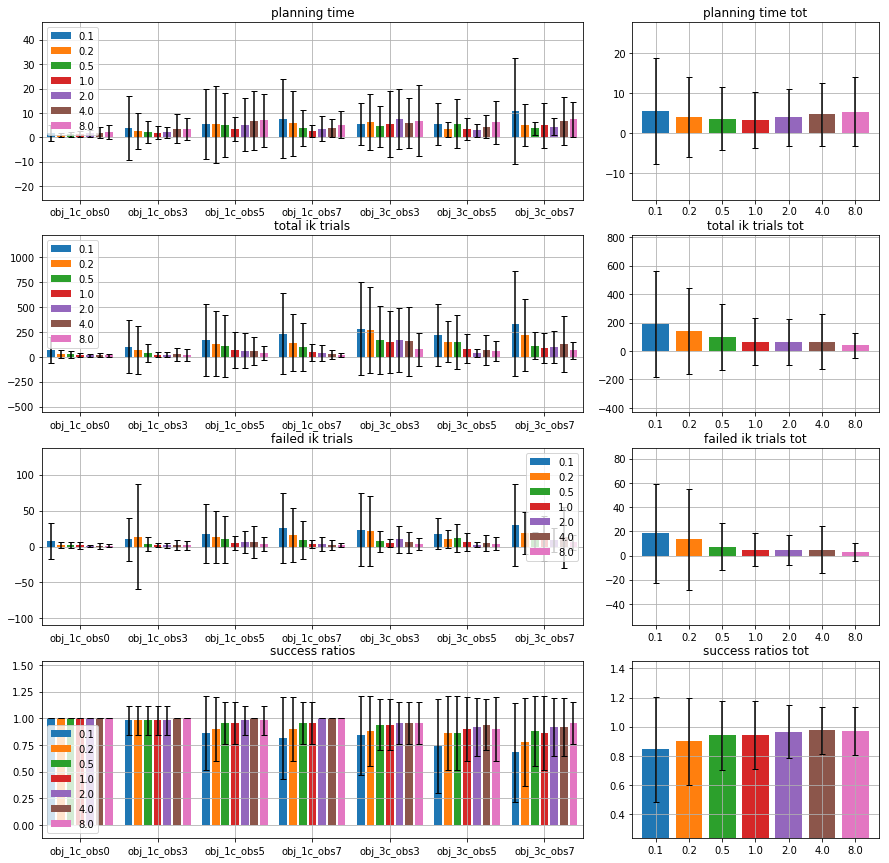

In [81]:
plt.figure(figsize=(15,15))

plt.subplot(4,3,(1, 2))
_ = plot_valid(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS, individual=True)
plt.title("planning time")
plt.subplot(4,3,3)
time_dict = plot_valid(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS, individual=True, average_all=True)
plt.title("planning time tot")

plt.subplot(4,3,(4, 5))
_ = plot_valid(resdat_all_accum, keys=["IK_tot"], CHECKERS=CHECKERS, individual=True)
plt.title("total ik trials")
plt.subplot(4,3,6)
_ = plot_valid(resdat_all_accum, keys=["IK_tot"], CHECKERS=CHECKERS, individual=True, average_all=True)
plt.title("total ik trials tot")

plt.subplot(4,3,(7, 8))
_ = plot_valid(resdat_all_accum, keys=["failed_IKs"], CHECKERS=CHECKERS, individual=True)
plt.title("failed ik trials")
plt.subplot(4,3,9)
_ = plot_valid(resdat_all_accum, keys=["failed_IKs"], CHECKERS=CHECKERS, individual=True, average_all=True)
plt.title("failed ik trials tot")

plt.subplot(4,3,(10, 11))
succ_dict = extract_values(resdat_all_accum, ["success"])
_ = grouped_bar(succ_dict)
plt.title("success ratios")
plt.subplot(4,3,12)
_ = grouped_bar(succ_dict, average_all=True)
plt.title("success ratios tot")

In [82]:
print("="*80)
success_vecs = [np.concatenate(map(lambda x: x["{:03}".format(mp_num)], succ_dict.values())) for mp_num in MP_TIMES]
success_means = map(np.mean, success_vecs)
max_val = np.max(success_means)
max_idc = np.where(success_means==max_val)[0]
print("MP_TIMES: ", "  ".join(map(lambda x:"{:5}".format(x), MP_TIMES)))
print("success: ", "  ".join(map(lambda x:"{:5.03}".format(x), success_means)))
print("best: {} ({:5.3})".format(np.array(MP_TIMES)[max_idc], max_val))
print("-"*80)
time_vecs = [np.concatenate(map(lambda x: x["{:03}".format(mp_num)], time_dict.values())) for mp_num in MP_TIMES]
time_means = np.array(map(np.mean, time_vecs))
min_val = np.min(time_means[max_idc])
min_idc = np.where(time_means[max_idc]==min_val)[0]
print("MP_TIMES: ", "  ".join(map(lambda x:"{:5}".format(x), MP_TIMES)))
print("times  : ", "  ".join(map(lambda x:"{:5.03}".format(x), time_means)))
print("best: {} ({:5.3})".format(np.array(MP_TIMES)[max_idc][min_idc], min_val))
print("="*80)

MP_TIMES:    0.1    0.2    0.5    1.0    2.0    4.0    8.0
success:  0.846    0.9   0.94  0.943  0.966  0.974  0.971
best: [4.] (0.974)
--------------------------------------------------------------------------------
MP_TIMES:    0.1    0.2    0.5    1.0    2.0    4.0    8.0
times  :    5.5   4.11   3.65   3.28   3.91   4.71   5.39
best: [4.] ( 4.71)


In [74]:
# !cp -rf ~/Projects/rnb-planning/data/stowing-deep-result-analysis-ik008_mp8.0 ~/Projects/rnb-planning/data/stowing-deep-result-analysis-ik008_mp8.0-bak

In [73]:
RES_ROOT

'stowing-deep-result-analysis-ik008_mp8.0'

In [72]:
RESULT_PATHS

['stowing-deep-result-analysis-ik008_mp0.1',
 'stowing-deep-result-analysis-ik008_mp0.2',
 'stowing-deep-result-analysis-ik008_mp0.5',
 'stowing-deep-result-analysis-ik008_mp1.0',
 'stowing-deep-result-analysis-ik008_mp2.0',
 'stowing-deep-result-analysis-ik008_mp4.0',
 'stowing-deep-result-analysis-ik008_mp8.0']